>**NB**: The project was conducted by **BOLARINWA AISHAT** in partial fulfilment of the requirements for the **ALX-T Data Analyst Udacity NanoDegree Program**

# Part I - [PROSPER]('https://www.prosper.com/') LOAN DATA EXPLORATION
## by BOLARINWA AISHAT

## Introduction
> **Prosper Marketplace, Inc.** is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.
Prosper Marketplace is America's first peer-to-peer lending marketplace, with over seven billion dollars in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from two thousand to forty thousand dollars per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.
Read more on the company [HERE]('https://en.wikipedia.org/wiki/Prosper_Marketplace')

> **Prosper Loan Data** : This [data set]('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv') contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary]('https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1666072219001097&usg=AOvVaw01_FnjF4p7Oc8-HzrgArFd') explains the variables in the data set.


## Preliminary Wrangling


In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Blocking warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the dataset

df = pd.read_csv('ProsperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.shape

(113937, 81)

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Not all the 81 columns in the dataset is relevant for the analysis. Using the [data dictionary]('https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0') as a guide, we will be selecting only the columns that will be needed at one point or the other during the data analysis process.

In [5]:
#After thorough assessment of the columns and the information they carry, 
#we will be selecting the ones necessary for our analysis.

df = df[['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ProsperRating (Alpha)',
         'ProsperScore', 'ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus',
         'EmploymentStatusDuration','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome',
         'LoanOriginalAmount','LoanOriginationDate']]
df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,2.0,True,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,NaN,False,Not displayed,2083.333333,3001,2007-01-17 00:00:00
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,2013-09-20 00:00:00


In [6]:
#Checking for duplicates

df.duplicated().any()

False

There are no duplicates in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  EmploymentStatusDuration   106312 non-null  float64
 13  IsBorrowerHomeowner        11

## Data Cleaning.

>Now that we have our dataset, streamlined to what we need, let's do some cleaning before analysis.

In [8]:
#Making a copy of the dataset for cleaning

dff = df.copy()

dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,2.0,True,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,NaN,False,Not displayed,2083.333333,3001,2007-01-17 00:00:00
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,2013-09-20 00:00:00


In [9]:
#Checking for null values

dff.isna().any()

ListingNumber                False
Term                         False
LoanStatus                   False
BorrowerAPR                   True
BorrowerRate                 False
LenderYield                  False
ProsperRating (Alpha)         True
ProsperScore                  True
ListingCategory (numeric)    False
BorrowerState                 True
Occupation                    True
EmploymentStatus              True
EmploymentStatusDuration      True
IsBorrowerHomeowner          False
IncomeRange                  False
StatedMonthlyIncome          False
LoanOriginalAmount           False
LoanOriginationDate          False
dtype: bool

Some null values exist in the dataset, let's remove them.

In [10]:
#Dropping null values in the dataset

dff = dff.dropna()

#Confirming if the null values have been dropped

dff.isna().any()

ListingNumber                False
Term                         False
LoanStatus                   False
BorrowerAPR                  False
BorrowerRate                 False
LenderYield                  False
ProsperRating (Alpha)        False
ProsperScore                 False
ListingCategory (numeric)    False
BorrowerState                False
Occupation                   False
EmploymentStatus             False
EmploymentStatusDuration     False
IsBorrowerHomeowner          False
IncomeRange                  False
StatedMonthlyIncome          False
LoanOriginalAmount           False
LoanOriginationDate          False
dtype: bool

There are no more null values in the dataset.

In [11]:
#Renaming columns for easier identification and simplicity

dff = dff.rename(columns = {'ProsperRating (Alpha)':'ProsperRating','ListingCategory (numeric)': 'ListingCategory',
            'IsBorrowerHomeowner': 'HomeOwner?'})
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,2013-09-20 00:00:00
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,2013-12-24 00:00:00
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,2013-04-18 00:00:00


>Now, we want to convert the LoanOriginationDate to datetime so as to be able to manipulate it easily (we want to extract the year and month the loan was taken, from the date).

In [12]:
#Converting the LoanOriginationDate column to datetime

dff["LoanOriginationDate"] = dff["LoanOriginationDate"].astype('datetime64[ns]')

#Extracting year and month from date

dff['LoanOriginationMonth']= dff['LoanOriginationDate'].dt.month
dff['LoanOriginationYear'] = dff['LoanOriginationDate'].dt.year

dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03,3,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01,11,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,2013-09-20,9,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,2013-12-24,12,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,2013-04-18,4,2013


>The LoanOriginationMonth is in numbers, we have to convert it to actual months for better understanding.

In [13]:
#Converting the month numbers to month name

def month(LoanOriginationMonth):
    
    if LoanOriginationMonth == 1:
        return 'Jan'
    
    elif LoanOriginationMonth == 2:
        return 'Feb'
    
    elif LoanOriginationMonth == 3:
        return 'Mar'
    
    elif LoanOriginationMonth == 4:
        return 'Apr'
    
    elif LoanOriginationMonth == 5:
        return 'May'
    
    elif LoanOriginationMonth == 6:
        return 'Jun'
    elif LoanOriginationMonth == 7:
        return 'Jul'
    
    elif LoanOriginationMonth == 8:
        return 'Aug'
    
    elif LoanOriginationMonth == 9:
        return 'Sep'
    
    elif LoanOriginationMonth == 10:
        return 'Oct'
    
    elif LoanOriginationMonth == 11:
        return 'Nov'
    
    else:
        return 'Dec'
    
dff['LoanOriginationMonth']= dff['LoanOriginationMonth'].apply(month)
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,2014-03-03,Mar,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,2012-11-01,Nov,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,2013-09-20,Sep,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,2013-12-24,Dec,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,2013-04-18,Apr,2013


>Since we now have a clomun for the month and year the loan was taken, the LoanOriginationDate can be removed from the dataset.

In [14]:
#Removing the LoanOriginationDate column

dff.drop('LoanOriginationDate',axis = 1, inplace=True)
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,Mar,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,Nov,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,Sep,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,Dec,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,Apr,2013


>The borrower's state is represented as city codes and not everybody will understand what all the city codes are, especially non-residents of the United states. In view of this, we will append the full name of the city to the city code. 

In [15]:
dff['BorrowerState'].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ', 'VA',
       'FL', 'PA', 'OR', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA', 'MI', 'NV',
       'NJ', 'TX', 'AR', 'SC', 'DE', 'UT', 'DC', 'MA', 'MO', 'CT', 'IN',
       'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'HI', 'NH', 'NE', 'WY',
       'AK', 'MT', 'VT', 'SD'], dtype=object)

These are the different city codes present in the data set. Only a few cities in the United states are left out but that's not our major concern. Let's focus on what we have in our dataset.

In [16]:
#Changing the City codes to city name for better understanding

state_dict = {'CO': 'Colorado', 'GA': 'Georgia', 'MN': 'Minnesota', 'NM': 'New Mexico', 'KS': 'Kansas', 'CA': 'California',
              'IL': 'Illinois', 'MD': 'Maryland', 'AL': 'Alabama', 'AZ': 'Arizona', 'VA': 'Virginia','FL': 'Florida', 
              'PA': 'Pennsylvania', 'OR': 'Oregon', 'NY': 'New York', 'LA': 'Louisiana', 'WI': 'Wisconsin',
              'OH': 'Ohio', 'NC': 'North Carolina', 'WA': 'Washington', 'MI': 'Michigan', 'NV': 'Nevada','NJ': 'New Jersey', 
              'TX': 'Texas', 'AR': 'Arkansas', 'SC': 'South Carolina', 'DE': 'Delaware', 'UT': 'Utah', 
              'DC': 'District of Columbia', 'MA': 'Massachusetts', 'MO': 'Missouri', 'CT': 'Connecticut', 'IN': 'Indiana',
              'KY': 'Kentucky', 'OK': 'Oklahoma', 'MS': 'Mississippi', 'WV': 'West Virginia', 'RI': 'Rhode Island', 
              'TN': 'Tennessee', 'ID': 'Idaho', 'HI': 'Hawaii', 'NH': 'New Hampshire', 'NE': 'Nebraska', 'WY': 'Wyoming',
              'AK': 'Alaska', 'MT': 'Montana', 'VT': 'Vermont', 'SD': 'South Dakota'}

dff['BorrowerState'] = dff['BorrowerState'].map(state_dict)
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,2,Colorado,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,Mar,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,16,Georgia,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,Nov,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,2,Minnesota,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,Sep,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,1,New Mexico,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,Dec,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,1,Kansas,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,Apr,2013


>The listing number is in integer format but since it's a unique identifier and no mathematical operation will be performed on it, we will convert it to an object.

In [17]:
#Converting ListingNumber to string

dff['ListingNumber'] = dff['ListingNumber'].astype(str)

#Confirming the new data type

dff['ListingNumber'].dtypes

dtype('O')

The ListingCategory is in numbers, but from the documentation of the data, each number represents a particular category, we will change the numbers to the category they represent for better understanding.

As extracted from the [data dictionary]('https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0'), The ListingCategory is the category of the listing that the borrower selected when posting their listing:  
0 - Not Available  
1 - Debt Consolidation  
2 - Home Improvement  
3 - Business  
4 - Personal Loan   
5 - Student Use  
6 - Auto  
7- Other   
8 - Baby&Adoption   
9 - Boat  
10 - Cosmetic Procedure   
11 - Engagement Ring  
12 - Green Loans  
13 - Household Expenses   
14 - Large Purchases  
15 - Medical/Dental  
16 - Motorcycle  
17 - RV  
18 - Taxes   
19 - Vacation    
20 - Wedding Loans

In [18]:
#Converting the numbers in the ListingCategory to actual categories

def listing(ListingCategory):
    
    if ListingCategory == 0:
        return 'Not Available'
    
    elif ListingCategory == 1:
        return 'Debt Consolidation'
    
    elif ListingCategory == 2:
        return 'Home Improvement'
    
    elif ListingCategory == 3:
        return 'Business'
    
    elif ListingCategory == 4:
        return 'Personal Loan'
    
    elif ListingCategory == 5:
        return 'Student Use'
    
    elif ListingCategory == 6:
        return 'Auto'
    
    elif ListingCategory == 7:
        return 'Other'
    
    elif ListingCategory == 8:
        return 'Baby&Adoption'
    
    elif ListingCategory == 9:
        return 'Boat'
    
    elif ListingCategory == 10:
        return 'Cosmetic Procedure'
    
    elif ListingCategory == 11:
        return 'Engagement Ring'
    
    elif ListingCategory == 12:
        return 'Green Loans'
    
    elif ListingCategory == 13:
        return 'Household Expenses'
    
    elif ListingCategory == 14:
        return 'Large Purchases'
    
    elif ListingCategory == 15:
        return 'Medical/Dental'
    
    elif ListingCategory == 16:
        return 'Motorcycle'
    
    elif ListingCategory == 17:
        return 'RV'
    
    elif ListingCategory == 18:
        return 'Taxes'
    
    elif ListingCategory == 19:
        return 'Vacation'
    
    else:
        return 'Wedding Loans'
    
dff['ListingCategory']= dff['ListingCategory'].apply(listing)
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,Mar,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,Nov,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,Sep,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,Debt Consolidation,New Mexico,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,Dec,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,Debt Consolidation,Kansas,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,Apr,2013


>Next, we want to convert the columns that are in categories to 'category' data type, this will help when plotting graphs.

In [19]:
dff['Term'].unique()

array([36, 60, 12], dtype=int64)

In [20]:
dff['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [21]:
dff['ProsperRating'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [22]:
dff['ProsperScore'].unique()

array([ 7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [23]:
dff['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

In [24]:
dff['EmploymentStatus'].unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [25]:
dff['HomeOwner?'].unique()

array([False,  True])

In [26]:
dff['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0'], dtype=object)

In [27]:
dff['LoanOriginationMonth'].unique()

array(['Mar', 'Nov', 'Sep', 'Dec', 'Apr', 'May', 'Jan', 'Jul', 'Oct',
       'Feb', 'Jun', 'Aug'], dtype=object)

In [28]:
dff['LoanOriginationYear'].unique()

array([2014, 2012, 2013, 2010, 2011, 2009], dtype=int64)

In [29]:
#Converting the above columns to categorical data types

ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Current', 'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)', 
                                   'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 
                                   'FinalPaymentInProgress','Defaulted','Chargedoff', 'Completed'],
                   'ProsperRating': ['AA', 'A','B', 'C', 'D', 'E', 'HR'],
                   'ProsperScore': [ 1., 2., 3., 4., 5., 6., 7., 8.,  9., 10., 11.],
                   'ListingCategory': ['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other','Household Expenses',
                                       'Auto', 'Medical/Dental', 'Wedding Loans','Vacation', 'Taxes', 'Business', 
                                       'Baby&Adoption','Engagement Ring', 'Large Purchases', 'Boat', 'RV',
                                       'Cosmetic Procedure', 'Not Available', 'Student Use','Green Loans'],
                   'EmploymentStatus': ['Employed',  'Full-time','Part-time', 'Self-employed', 
                                        'Retired','Not employed',  'Other',],
                   'HomeOwner?': [True, False],
                   'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
                                   '$100,000+'],
                   'LoanOriginationMonth': ['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                            'Oct', 'Nov', 'Dec'],
                   'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    dff[var] = dff[var].astype(ordered_var)
    
#Confirming the data types of the columns

dff.dtypes

ListingNumber                 object
Term                        category
LoanStatus                  category
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating               category
ProsperScore                category
ListingCategory             category
BorrowerState                 object
Occupation                    object
EmploymentStatus            category
EmploymentStatusDuration     float64
HomeOwner?                  category
IncomeRange                 category
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationMonth        category
LoanOriginationYear         category
dtype: object

In [30]:
dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,Mar,2014
3,658116,36,Current,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,Nov,2012
4,909464,36,Current,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,Sep,2013
5,1074836,60,Current,0.15425,0.1314,0.1214,B,10.0,Debt Consolidation,New Mexico,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,Dec,2013
6,750899,36,Current,0.31032,0.2712,0.2612,E,2.0,Debt Consolidation,Kansas,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,Apr,2013


In [31]:
dff.shape

(83507, 19)

>The BorrowerAPR which is the Borrower's Annual Percentage Rate, the BorrowerRate and the LenderYield are better expressed as a percentage so, we will convert them to percents.

In [32]:
#Converting BorrowerAPR, BorrowerRate and LenderYield to percentage

dff['BorrowerAPR'] = (dff['BorrowerAPR']*100).round(2)
dff['BorrowerRate'] = (dff['BorrowerRate']*100).round(2)
dff['LenderYield'] = (dff['LenderYield']*100).round(2)

dff.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,HomeOwner?,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationMonth,LoanOriginationYear
1,1209647,36,Current,12.02,9.20,8.20,A,7.0,Home Improvement,Colorado,Professional,Employed,44.0,False,"$50,000-74,999",6125.000000,10000,Mar,2014
3,658116,36,Current,12.53,9.74,8.74,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,113.0,True,"$25,000-49,999",2875.000000,10000,Nov,2012
4,909464,36,Current,24.61,20.85,19.85,D,4.0,Home Improvement,Minnesota,Executive,Employed,44.0,True,"$100,000+",9583.333333,15000,Sep,2013
5,1074836,60,Current,15.42,13.14,12.14,B,10.0,Debt Consolidation,New Mexico,Professional,Employed,82.0,True,"$100,000+",8333.333333,15000,Dec,2013
6,750899,36,Current,31.03,27.12,26.12,E,2.0,Debt Consolidation,Kansas,Sales - Retail,Employed,172.0,False,"$25,000-49,999",2083.333333,3000,Apr,2013


In [33]:
dff.shape

(83507, 19)

Now!, this is what we have! Let's briefly answer a few questions on our dataset. Leggo...

### What is the structure of your dataset?

> The main dataset contain **113937** rows and **81** columns. After thorough cleaning, the dataset contains **83507** records and **19** features.  
The variables includes:  
**ListingNumber:** The number that uniquely identifies the listing to the public as displayed on the website.  
**Term:** The length of the loan expressed in months.  
**LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress.  
**ProsperRating:** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.  
**BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.  
**BorrowerRate:** The Borrower's interest rate for this loan.  
**LenderYield:** The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.  
**ProsperScore:** A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.  
**Listing_category:** The category of the listing that the borrower selected when posting their listing.  
**Occupation:** The Occupation selected by the Borrower at the time they created the listing.  
**EmploymentStatus:** The employment status of the borrower at the time they posted the listing.  
**EmploymentStatusDuration:** The length in months of the employment status at the time the listing was created.  
**Homeowner?:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.  
**IncomeRange:** The income range of the borrower at the time the listing was created.  
**LoanOriginalAmount:** The origination amount of the loan.  
**BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.  
**StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.  
**LoanOriginationYear:** The date the loan was originated.  
**LoanOriginationMonth:** The Month the loan was originated.  

### What is/are the main feature(s) of interest in your dataset?

> BorrowerAPR  
LenderYield  
LoanOriginalAmount  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ProspeRating  
ProsperScore  
Occupation  
EmploymentStatus  
IncomeRange 

## Univariate Exploration

> In this section, we will investigate the distributions of individual variables, look
out for unusual points or outliers, take a deeper look to clean things up
and prepare to look at relationships between variables.

>**Note**: We will use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Question 1:

**What is the distribution of Loan status and Listing category in the data set?**

### Visualisation

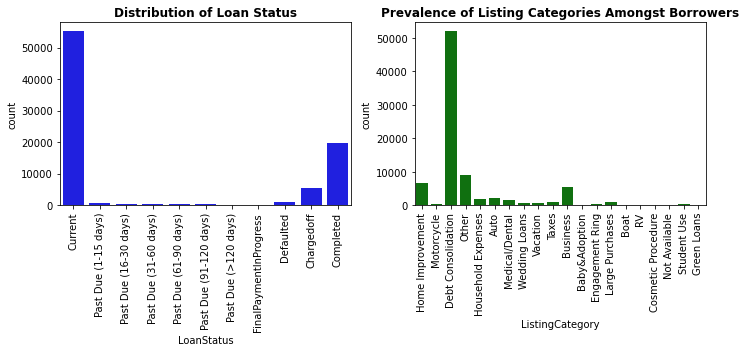

In [34]:
fig = plt.figure(figsize=(10, 5))

#Distribution of LoanStatus

plt.subplot(1,2,1)
sns.countplot(data = dff, x='LoanStatus', color = 'blue')
plt.xticks(rotation=90)
plt.title('Distribution of Loan Status', fontweight = 'bold')

#Distribution of ListingCategory

plt.subplot(1,2,2)
sns.countplot(data = dff, x='ListingCategory', color = 'green')
plt.xticks(rotation=90)
plt.title('Prevalence of Listing Categories Amongst Borrowers', fontweight = 'bold')

plt.tight_layout();

### Observation

>   The vast majority of the loan data collected has borrowers still running their loan term ie 'current'. Next is the total number of loans that have been completed. The third most common instance in the distribution of loan status are those charged off. This means that a portion or an amount of an account owed is removed, counting as a loss (as a gesture of goodwill for example). The number of borrowers who defaulted follows the charged off loans, although, the gap is very glaring.   
  Debt consolidation is the most prevalent listing category in the data set. More than half of all the loans are taken for debt consolidation. Debt consolidation means that the various debts of a borrower whether credit card bills or other loan payments are rolled into one loan or monthly payment. If one has multiple credit card accounts or loans, consolidation may be a way to simplify or lower payments. The next most prevalent category is the 'other' category and is about one fifth as much as the debt consolidation category when compared. Next is the 'home improvement' category which is almost as prevalent as the 'other' category.

### Question 2:

**What is the distribution of Home owners and Employment status in the data set?**

### Visualisation

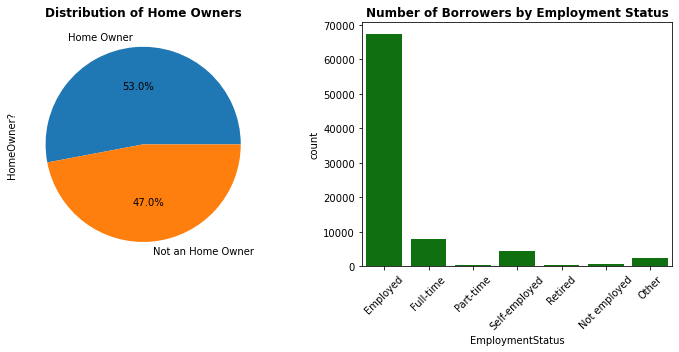

In [35]:
#Distribution of HomeOwners

plt.subplot(1,2,1)
dff['HomeOwner?'].value_counts().plot(kind= 'pie', figsize= (10,5), startangle= 360,
                                      labels = ['Home Owner', 'Not an Home Owner'], autopct='%1.1f%%')
plt.title('Distribution of Home Owners', fontweight = 'bold')

#Distribution of EmploymentStatus

plt.subplot(1,2,2)
sns.countplot(data = dff, x='EmploymentStatus', color = 'green')
plt.xticks(rotation=45)
plt.title('Number of Borrowers by Employment Status', fontweight = 'bold')

plt.tight_layout()

### Observation

> The number of borrowers who are home owners and those who aren't is evenly distributed in the data set, although, the number of home owners is slightly higher than those who do not own a house.   
Majority of the borrowers are employed, as expected. Who will lend out a loan to someone who doesn't have a means of paying back ? Not me though!. The least common borrowers work part time or are retired. We assume most retired people have pension to live on. Just an assumption...

### Question 3:

**What is the distribution of Term of loan, Loan origination Month and Year?** 

### Visualisation

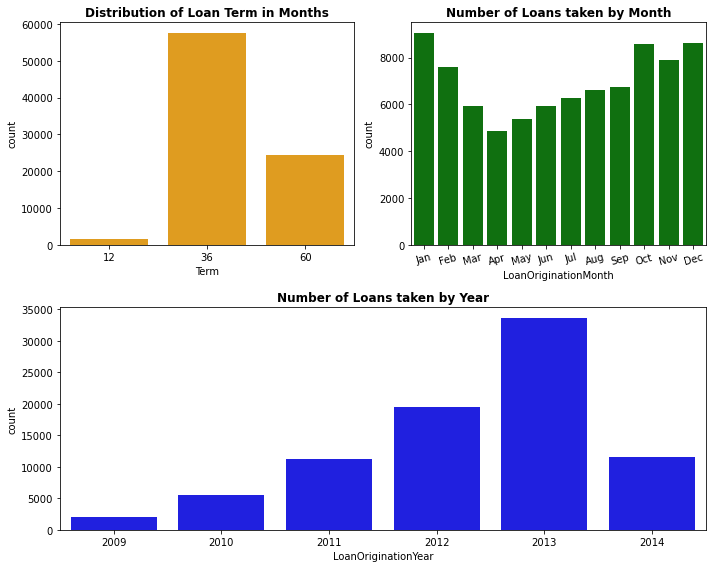

In [36]:
fig = plt.figure(figsize=(10, 8))

#Distribution of Term

plt.subplot(2,2,1)
sns.countplot(data = dff, x='Term', color = 'orange')
plt.title('Distribution of Loan Term in Months', fontweight = 'bold')

#Distribution of LoanOriginationMonth

plt.subplot(2,2,2)
sns.countplot(data = dff, x='LoanOriginationMonth', color = 'green')
plt.xticks(rotation=15)
plt.title('Number of Loans taken by Month', fontweight = 'bold')

#Distribution of LoanOriginationYear

plt.subplot(2,1,2)
sns.countplot(data = dff, x='LoanOriginationYear', color = 'blue')
plt.title('Number of Loans taken by Year', fontweight = 'bold')

plt.tight_layout();

### Observation

> Three distinct terms of loan was captured in the data set. One year, three years and five years, recorded in number of months as in, 12 months, 36 months and 60 months respectively. The most frequent loan term is three years, followed by five years. Borrowers seldom take a one-year loan.  
The prevalence of loan taking over the months, yearly follows a V-shaped distribution in that the frequency of loan taking is highest in January, the first month of the year and reduces exponentially in the first quater and then increases steadily till the end of the year with a slight drop in November. In summary, People take loans mostly in January, some New year resolution deals *winks*.   
The data set captures loans taken between 2009 and 2014. Of the six years, 2013 had the highest number of borrowers. Further investigation will need to be taken to find out why. The number of borrowers actually increased steadily from 2009 to 2013 and there was a significant drop in 2014.

### Question 4:

**What is the distribution of Loan original amount?**

### Visualisation

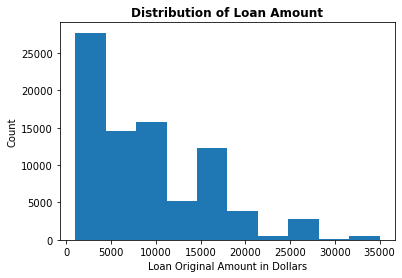

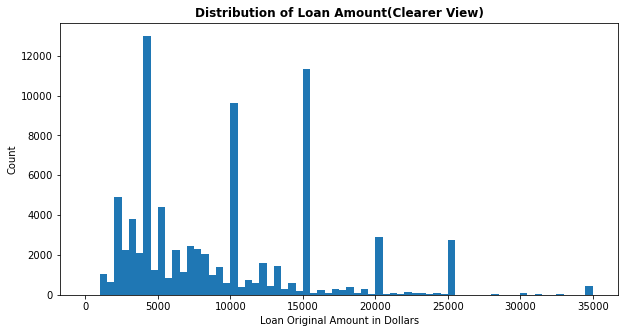

In [37]:
#Plotting a histogram for the distribution of LoanOriginalAmount

plt.hist(data = dff, x='LoanOriginalAmount')
plt.xlabel('Loan Original Amount in Dollars')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount', fontweight = 'bold')

#Reducing bin size to zoom out the histogram
binsize = 500
bins = np.arange(0, dff['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = dff, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount in Dollars')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount(Clearer View)', fontweight = 'bold');
plt.show()

### Observation

> The distribution of the amount of loan taken is **trimodal**, having peaks around 5,000, 10,000 and 15,000 dollars. The most commmon amount taken as loan is around 5,000 dollars followed by 15,000 dollars and then 10,000 dollars. 

### Question 5:

**What is the distribution of Borrower APR?**

### Visualisation

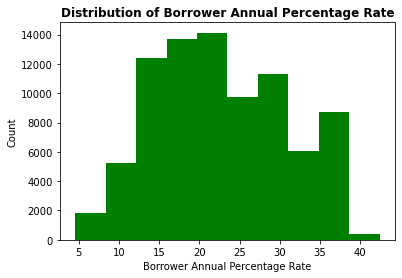

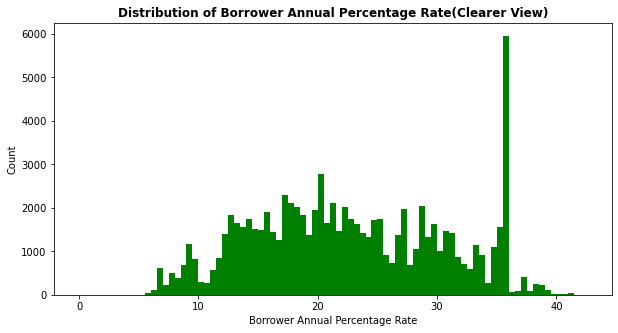

In [38]:
# A simple histogram plot of the variable LoanOriginalAmount

plt.hist(data = dff, x='BorrowerAPR', color = 'green')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Count')
plt.title('Distribution of Borrower Annual Percentage Rate', fontweight = 'bold')

#further investigating
binsize = 0.5
bins = np.arange(0, dff['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = dff, x = 'BorrowerAPR', color = 'green', bins = bins)
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Count')
plt.title('Distribution of Borrower Annual Percentage Rate(Clearer View)', fontweight = 'bold');
plt.show()

### Observation

> The BorrowerAPR shows a **unimodal** distribution in the left side of the plot. The APR with the highest frequency of occurence is about 37%.

### Question 6:

**Which states have the most borrowers?**

### Visualisation

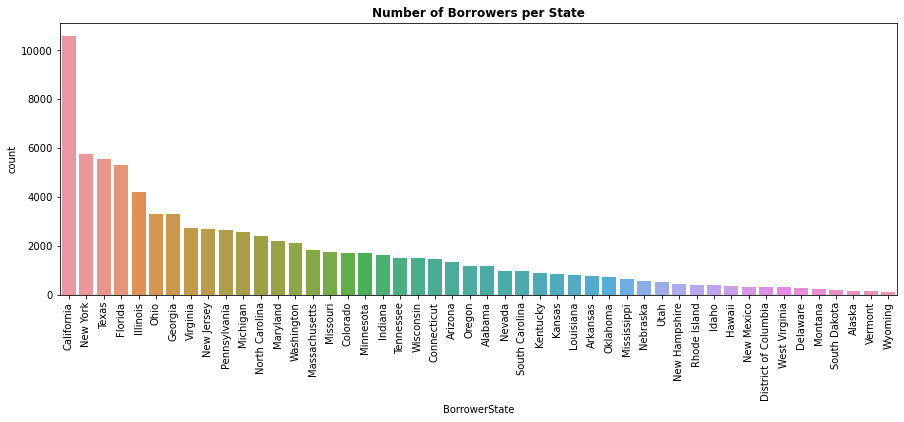

In [39]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data = dff, x='BorrowerState', order = dff['BorrowerState'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Borrowers per State', fontweight = 'bold');

### Observation

> As seen in the bar chart above, California is the state with the highest number of borrowers. Recall that the data set was gotten from Prosper, a San Francisco, California-based company, It is understandable if most of the borrowers are from the same city as their headquarters. Other cities with large number of borrowers include New york, Texas, Florida, Illinois etc. Ohio and Georgia have eaqual number of borrowers.   
Further research from [this source]('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States') shows that the above named cities are among the most populated cities in the United States of America.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data set. The variables mostly cover those that have been explored in the previous section (univariate exploration).

### Question 7:

**What is the relationship between Income, Loan amount and Prosper rating?**

### Visualisation

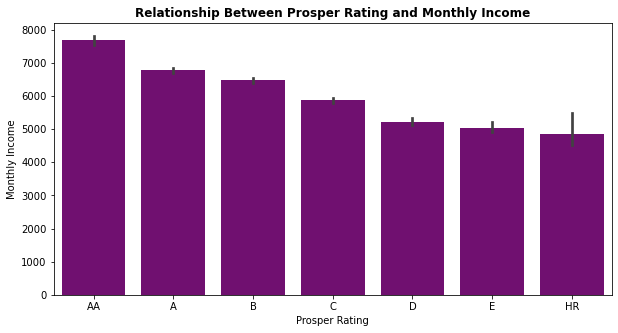

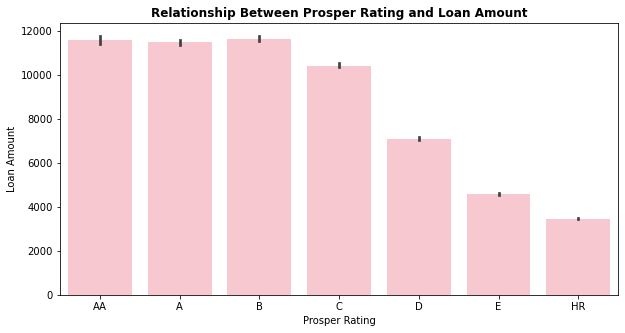

In [40]:
plt.figure(figsize = [10,5])


sns.barplot(data = dff, x = 'ProsperRating', y='StatedMonthlyIncome', color = 'purple')
plt.ylabel('Monthly Income')
plt.xlabel('Prosper Rating')
plt.title('Relationship Between Prosper Rating and Monthly Income', fontweight = 'bold')
plt.show()

plt.figure(figsize = [10,5])


sns.barplot(data = dff, x = 'ProsperRating', y='LoanOriginalAmount', color = 'pink')
plt.ylabel('Loan Amount')
plt.xlabel('Prosper Rating')
plt.title('Relationship Between Prosper Rating and Loan Amount', fontweight = 'bold')
plt.show()

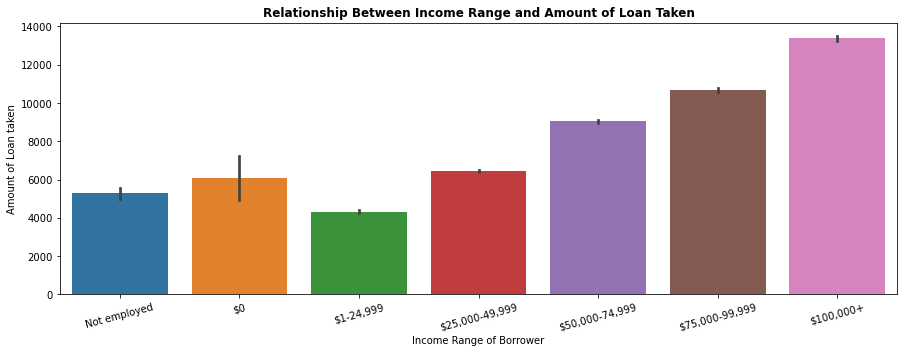

In [41]:
plt.figure(figsize=[15,5])
orders = dff.groupby(['IncomeRange'])['LoanOriginalAmount'].mean().index
sns.barplot(data = dff, x='IncomeRange', y='LoanOriginalAmount',order = orders)
plt.ylabel('Amount of Loan taken')
plt.xlabel('Income Range of Borrower')
plt.title('Relationship Between Income Range and Amount of Loan Taken', fontweight = 'bold')
plt.xticks(rotation=15)
plt.show()

### Observation

> The relationship between prosper rating and monthly income is a direct relationship. The prosper rating ranges from AA, A, B, C, D, E to HR with AA being the best rating and HR being the worst. From the purple bar chart above, it is observed that those with higher monthly income get the best prosper ratings and those with lower monthly income get poor prosper rating.  
Again, the relationship between prosper rating and the amount of loan taken is a direct relationship as seen in the pink bar chart above. Those with the best prosper rating get the highest amount of loan and those with poor prosper rating get the least amount as loan.  
Comparing the income range of the borrower and the amount of loan taken, there is a general direct proportionality. The highest income earners took the highest amount of loan. It is worthy of note that the average amount of loan taken by unemployed borrowers is higher that those who earn between one dollar to twenty four thousand, nine hundred and ninety nine dollars (1- 24,999) which is different from the general trend observed. Also, borrowers that fall under the zero dollar income range category took higher amount of loans that the unemployed borrowers.

### Question 8:

**How does the Prosper Score and Rating affect Borrower's APR?**

### Visualisation

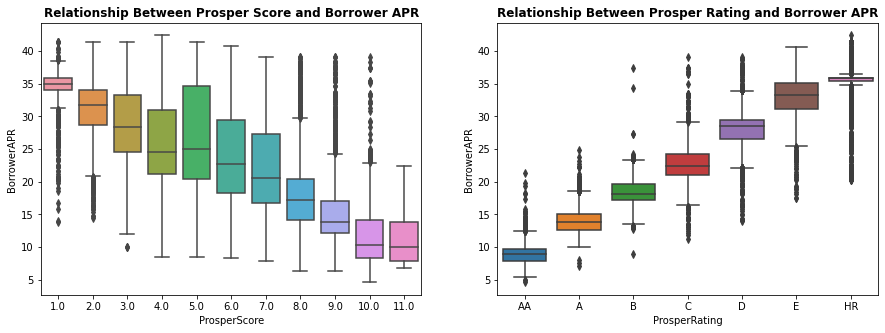

In [42]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.boxplot(data = dff, x = 'ProsperScore', y = 'BorrowerAPR')
plt.title('Relationship Between Prosper Score and Borrower APR', fontweight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(data = dff, x='ProsperRating', y='BorrowerAPR')
plt.title('Relationship Between Prosper Rating and Borrower APR', fontweight = 'bold');

### Observation

>As the prosper score increases from 1 to 11 with 1 being the least and 11 being the highest score, the borrower's annual percentage rate reduces. This means that those who score high will get lower interest on their loan compared to those who have low prosper score. This is an inverse relationship. To reduce the amount of interest to be paid on loans, users should strive to get higher prosper score.  
Similarly, borrowers with good prosper ratings like AA, A and B get to pay lower interest than those with poor ratings like HR and E pay high interest on loans.

### Question 9:

**What is the relationship between Borrower's APR and Lender's Yield?**

### Visualisation

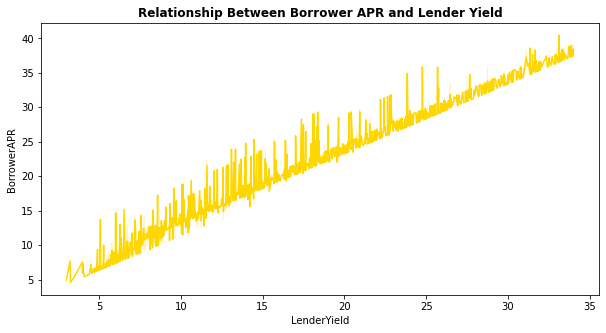

In [43]:
plt.figure(figsize = [10,5])

sns.lineplot(data = dff, x = 'LenderYield', y='BorrowerAPR', color = 'gold')
plt.ylabel('BorrowerAPR')
plt.xlabel('LenderYield')
plt.title('Relationship Between Borrower APR and Lender Yield', fontweight = 'bold')
plt.show()

### Observation

> As the borrower's APR increases, lender's yield increases as well. The more interest the borrower pays, the more yield the lender gets from such loan transaction.

### Question 10:

**How does the Prosper rating and score affect Lender yield?**

### Visualisation

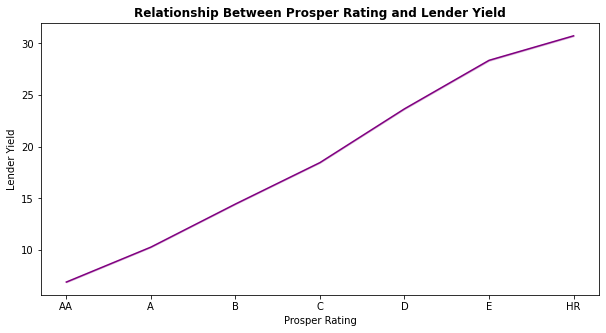

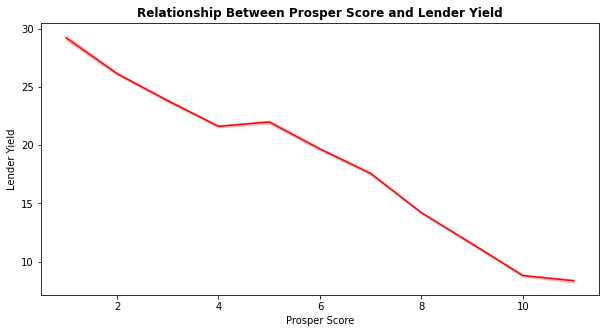

In [44]:
plt.figure(figsize = [10,5])

sns.lineplot(data = dff, x = 'ProsperRating', y='LenderYield', color = 'purple')
plt.ylabel('Lender Yield')
plt.xlabel('Prosper Rating')
plt.title('Relationship Between Prosper Rating and Lender Yield', fontweight = 'bold')
plt.show()

plt.figure(figsize = [10,5])
sns.lineplot(data = dff, x = 'ProsperScore', y='LenderYield', color = 'red')
plt.ylabel('Lender Yield')
plt.xlabel('Prosper Score')
plt.title('Relationship Between Prosper Score and Lender Yield', fontweight = 'bold')
plt.show()

### Observation

>Lender's yield is higher when the borrower has poor ratings and low prosper score and vice versa. This can be attributed to the fact that poor ratings and low prosper scores attract high borrower APR consequently increasing the lender's yield.

### Question 11:

**Which occupation borrows the most amount of money?**

### Visualisation

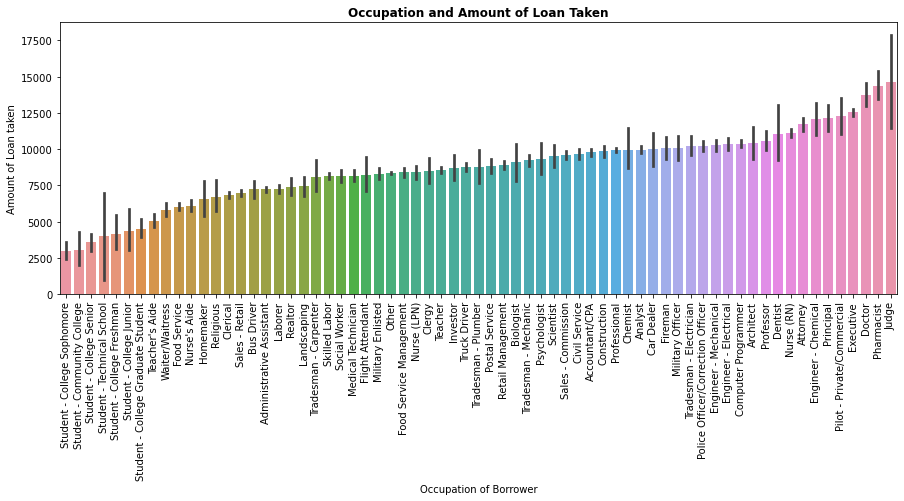

In [45]:
plt.figure(figsize=[15,5])
orders = dff.groupby(['Occupation'])['LoanOriginalAmount'].mean().sort_values().index
sns.barplot(data = dff, x='Occupation', y='LoanOriginalAmount',order = orders)
plt.ylabel('Amount of Loan taken')
plt.xlabel('Occupation of Borrower')
plt.title('Occupation and Amount of Loan Taken', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

### Observation

> **Wow!!** What a discovery! Judges, Pharmacists and Doctor's take the highest amount of loan on the prosper platform and students take the least amount of loan. The fact that judges, pharmacists and doctors are high income earners and we've established that higher income range goes hand in hand with high amount of loan justisfies this discovery.

### Question 12:

**Which occupation takes loan most frequently?**

### Visualisation

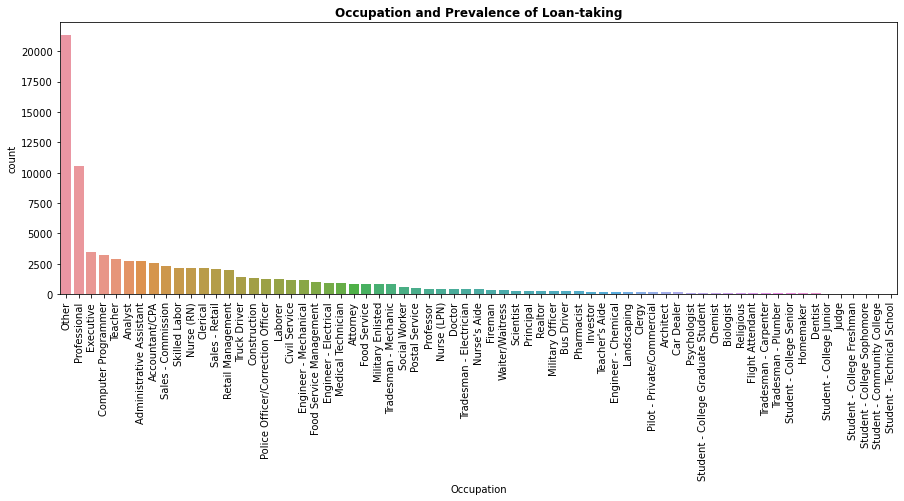

In [46]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data = dff, x='Occupation', order = dff['Occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation and Prevalence of Loan-taking', fontweight = 'bold');

### Observation

> Again, students take loan least frequently and borrowers whose occupation fall under the 'other' category are the most prevalent loan takers. Notice how the frequency of loan taking amongst judges, pharmacists and doctors is very low yet they take the highest amount as loan. This just implies that judges, pharmacists or doctors in the United states seldom take loan but when they do, they are accorded a large amount since their job/career path gives very reliable income stream and lenders can be rest assured that defaulters will rarely come from this group. 

Because i will become a pharmacist soon and I'm so excited about the profession, permit me to run a visualisation to satisfy my curiosity.

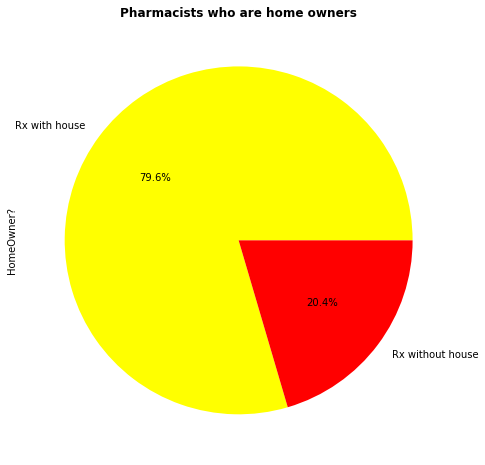

In [47]:
#Selecting only borrowers who are pharmacists

Rx = dff[(dff['Occupation'] == 'Pharmacist')]

#Plotting a piechart for the number of home owners
Rx['HomeOwner?'].value_counts().plot(kind= 'pie', figsize= (10,8), startangle= 360, colors=['yellow', 'red'],
                                     labels = ['Rx with house', 'Rx without house'], autopct='%1.1f%%')
plt.title('Pharmacists who are home owners', fontweight = 'bold');

80% of the pharmacists own a house, yippie, my chances of owning a house after graduating is on the high side!

### Question 13:

**What is the correlation between the numeric variables in the data set?**

### Visualisation

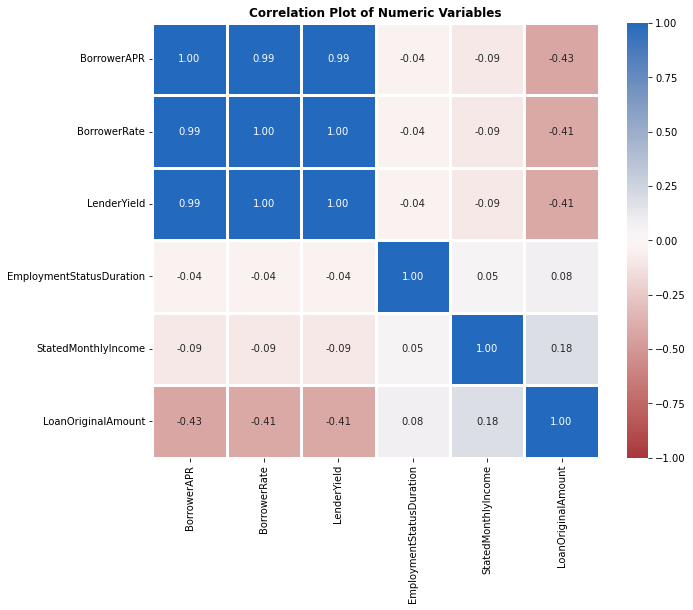

In [48]:
plt.figure(figsize= [10, 8])
sns.heatmap(data=dff.corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation = 90)
plt.title('Correlation Plot of Numeric Variables', fontweight = 'bold');

### Observation

> There is a strong positive correlation between BorrowerAPR, BorrowerRate and LenderYield. There is a weak negative correlation between LoanOriginalAmount and the variables stated earlier (ie BorrowerAPR, BorrowerRate and LenderYield).

## Multivariate Exploration

> In this section, we will create plots of three or more variables to investigate our data even
further, justify our investigations and follow from
our work in the previous sections.

### Question 14:

**Discuss the relationship among ProsperRating, BorrowerAPR, LoanOriginalAmount and HomeOwner?**

### Visualisation

'Multivariate Exploration of ProsperRating, LoanOriginalAmount, BorrowerAPR and HomeOwner?'

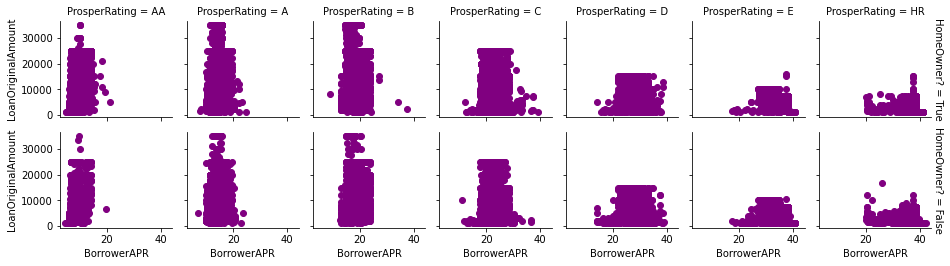

In [49]:
viz1 = sns.FacetGrid(data = dff, col = 'ProsperRating', row = 'HomeOwner?', size = 1.9, margin_titles = True)
viz1.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', color = 'purple')
'Multivariate Exploration of ProsperRating, LoanOriginalAmount, BorrowerAPR and HomeOwner?'

### Observation

> The first thing to observe from the above plot is that the graph of BorrowerAPR against LoanOriginalAmount for various ProsperRating when the borrower is an home owner when they are not is quite difficult to tell apart. The distribution is very similar and that means, owning a house doesn't play a much significant role in determining the LoanOriginalAmount, the BorrowerAPR or the ProsperRating. Secondly, the individual graphs gradually move from left, closer to the y-plane to right, farther from the y-plane. This shows that the BorrowerAPR increases as the ProsperRating drops, from AA to HR. Also, the height of the individual graphs reduces noticeably as we move from left where the rating is best to right where the rating is worst. This confirms that borrowers with the best ratings get the highest amount of loan and borrowers with the worst ratings get the least amount as loan.

### Question 15:

**Find out the correlation between the average BorrowerRate and LoanOriginalAmount of being an home owner or otherwise with respect to the Term of loan**

### Visualisation

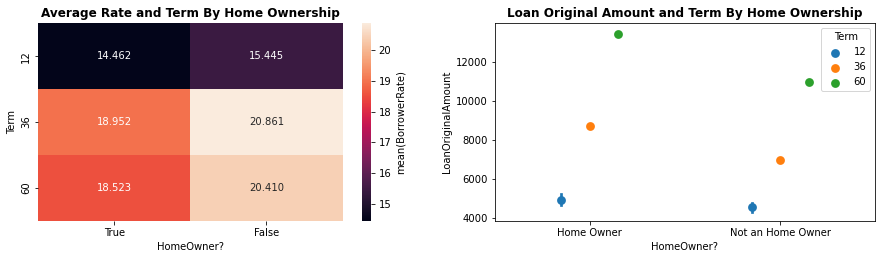

In [50]:
plt.figure(figsize = [15,8])
plt.subplot(2,2,2)
ax = sns.pointplot(data = dff, x = 'HomeOwner?', y = 'LoanOriginalAmount', hue = 'Term',
                  dodge = 0.3, linestyles = "")
plt.title('Loan Original Amount and Term By Home Ownership', fontweight = 'bold')
plt.xticks([0,1], ['Home Owner', 'Not an Home Owner'])


plt.subplot(2,2,1)
viz2 = dff.groupby(['HomeOwner?', 'Term']).mean()['BorrowerRate']
viz2 = viz2.reset_index(name = 'BorrowerRate_avg')
viz2 = viz2.pivot(index = 'Term', columns = 'HomeOwner?',
                            values = 'BorrowerRate_avg')
sns.heatmap(viz2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})
plt.title('Average Rate and Term By Home Ownership', fontweight = 'bold');

### Observation

> From the plot on the left, it can be observed that borrowers who are home owners and took a 12 monnths loan got the least rate and borrowers who do not own a house and took a 36 months loan got the highest rate overall. At every point and term, be it 12, 36 or 60 months, home owners got a lower rate compared to those who do not own a house.   
From the plot on the right, there is a similar trend in the change in LoaanOriginalAmount with Term for home owners and those who do not own a house. The longer the term of the loan, the higher the original loan amount. Home owners also tend to get a higher LoanOriginalAmount compared to borrowers who do not own a house.

## Conclusions

After exploring the dataset, it was found that more than half of the loan is still active, ie the borrowers are still running their loan term which is mostly a three year spanned loan and that **Debt consolidation** was the most common reason for taking loan. It was also found that the distribution of home owners is even, 53% of borrowers own a house. Majority of the borrowers come from California, New York, Texas and Florida and are either Professionals, Executives or belong to the 'Other' category of Occupation. Prosper score and Prosper rating is a good determinant of the borrower's rate, annual percentage rate (APR), lender's yield, loan amount etc.

In conclusion, as a borrower who seeks to use the prosper loan platform, one should strive to get good prosper ratings and high prosper score by possessing one or more of the following features;
1) Employed  
2) High income earner  
3) Home Owner  
4) Be a Pharmacist, Judge or Doctor  
5) Take long term loans etc.  

As a lender who seeks to use the prosper loan platform, one should bare the following in mind;
1) Low income earners bring the highest yield  
2) High income earners bring lower risk   
3) Ownership of a house is not a major determinant but can be considered  
4) Long term loans give lower yield   
5) Cities like California, New York, Texas and Florida have the highest amount of borrowers.  